<div class="row">
  <div class="column">
    <img src="./img/logo-onera.png" width="200">
  </div>
  <div class="column">
    <img src="./img/logo-ISAE_SUPAERO.png" width="200">
  </div>
</div>

# FAST-OAD Postprocessing Tutorial
FAST-OAD is a framework for performing rapid Overall Aircraft Design. The computational core of FAST-OAD is based on the  [OpenMDAO framework](https://openmdao.org/).



This notebook will show you the basic postprocessing features that FAST-OAD offers.

**Note: The 01_tutorial notebook has to be run to generate the results files used in this postprocessing notebook**

*Tip: hover your mouse pointer over any plot to inspect it or get menu to manipulate it*

In [1]:
import os.path as pth
import fastoad.api as oad

To illustrate the set of postprocessing plots we will use the three designs obtained in the `01_tutorial` notebook:
- CeRAS 2750 nm Multidisciplinary Design Analysis (MDA)
- CeRAS 800 nm Multidisciplinary Design Analysis (MDA)
- CeRAS 2750 nm Multidisciplinary Design Optimization (MDO)

In [2]:
DATA_FOLDER_PATH = "data"
WORK_FOLDER_PATH = "workdir"

CeRAS_2750nm_MDA_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs_CeRAS_2750nm_mda.xml")
CeRAS_800nm_MDA_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs_CeRAS_800nm_mda.xml")
CeRAS_2750nm_MDO_OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs_CeRAS_2750nm_mdo.xml")

## 1. Introduction

The general philosophy of the postprocessing plots is to use the result data file as the source information. Hence, offline of the computational process. Furthermore, the idea is to compare design results by enabling the superposition of different plots for the postprocessing plots where comparison is relevant.

## 1. Geometry plots
For instance here, we use the `fig` variable generated by the code line 1 and plot the result of line 2 on the existing figure. There is no number of maximum superpositions.

In [4]:
# fig = oad.wing_geometry_plot(CeRAS_2750nm_MDA_OUTPUT_FILE, name='CeRAS 2750 nm MDA')
# fig = oad.wing_geometry_plot(CeRAS_800nm_MDA_OUTPUT_FILE, name='CeRAS 800 nm MDA', fig=fig)
fig = oad.wing_geometry_plot(CeRAS_2750nm_MDO_OUTPUT_FILE, name="CeRAS 2750 nm MDO", fig=fig)
fig.show()

OSError: Error reading file 'workdir\problem_outputs_CeRAS_2750nm_mdo.xml': failed to load external entity "workdir/problem_outputs_CeRAS_2750nm_mdo.xml"

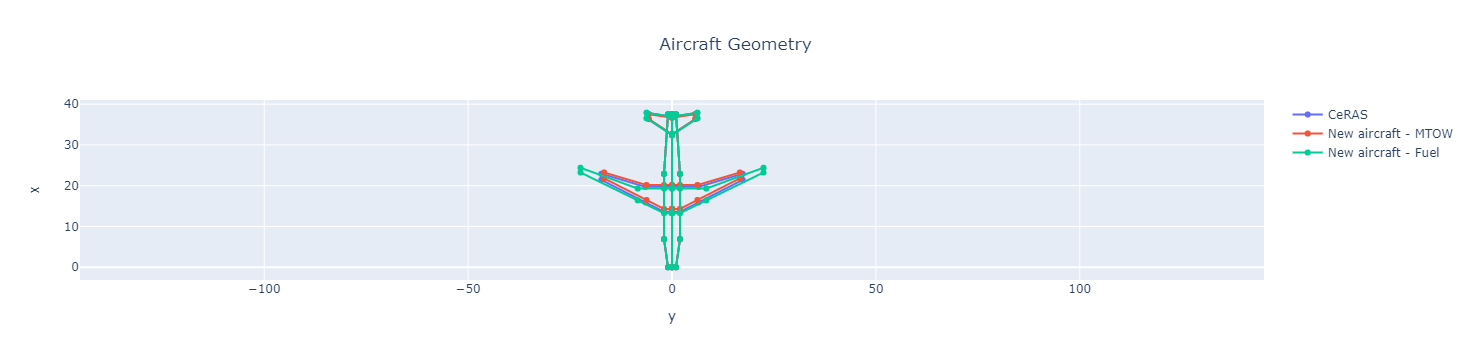

In [8]:
fig = oad.aircraft_geometry_plot(CeRAS_2750nm_MDA_OUTPUT_FILE, name="CeRAS")
fig = oad.aircraft_geometry_plot(CeRAS_800nm_MDA_OUTPUT_FILE, name="New aircraft - MTOW", fig=fig)
fig = oad.aircraft_geometry_plot(CeRAS_2750nm_MDO_OUTPUT_FILE, name="New aircraft - Fuel", fig=fig)
fig.show()

## 2. Aerodynamic plots


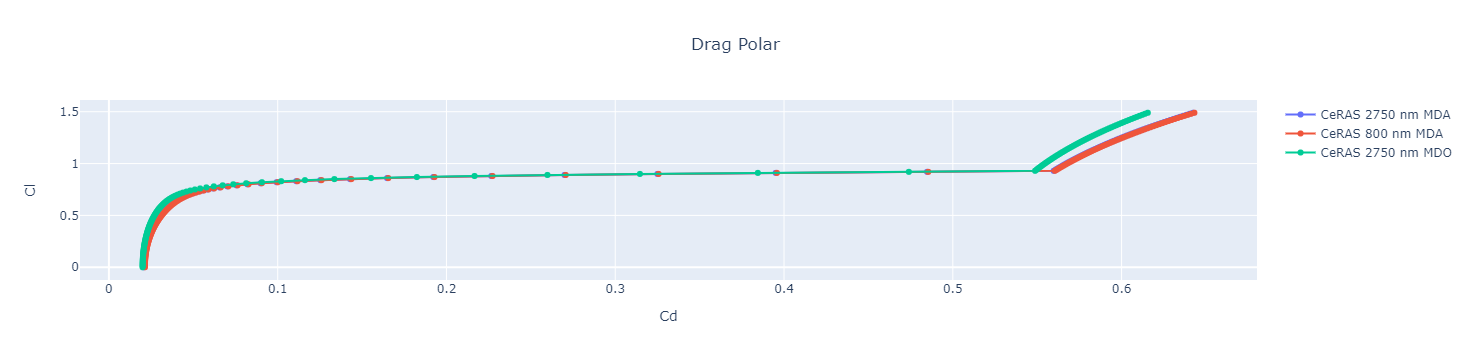

In [5]:
fig = oad.drag_polar_plot(CeRAS_2750nm_MDA_OUTPUT_FILE, name="CeRAS 2750 nm MDA")
fig = oad.drag_polar_plot(CeRAS_800nm_MDA_OUTPUT_FILE, name="CeRAS 800 nm MDA", fig=fig)
fig = oad.drag_polar_plot(CeRAS_2750nm_MDO_OUTPUT_FILE, name="CeRAS 2750 nm MDO", fig=fig)
fig.show()

## 3. Mass breakdown plots

This first mass breakdown plot enables to visualize the Maximum TakeOff Weight (MTOW) and Overall Weight Empty (OWE) for a single design.

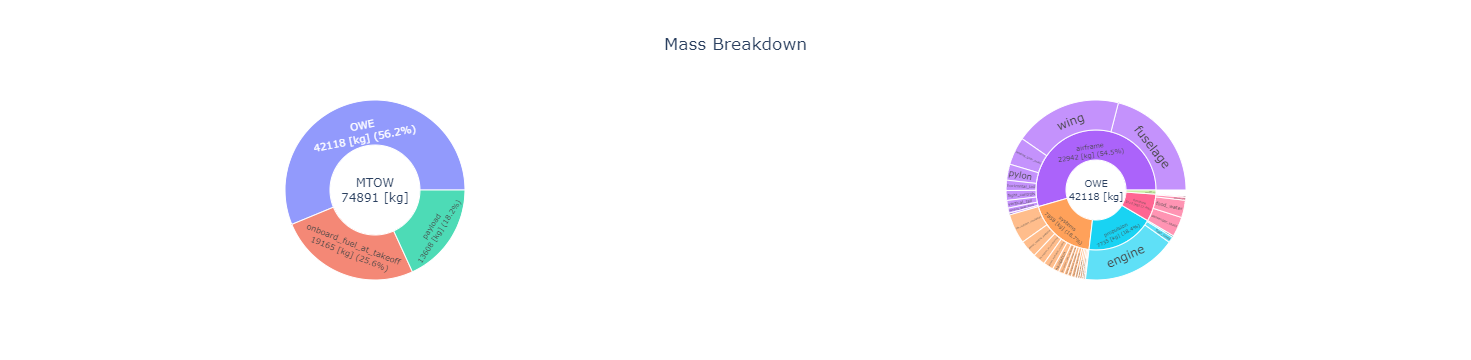

In [6]:
fig = oad.mass_breakdown_sun_plot(CeRAS_2750nm_MDA_OUTPUT_FILE)
fig.show()

This second mass breakdown plot provides less detail but enables to compare designs.

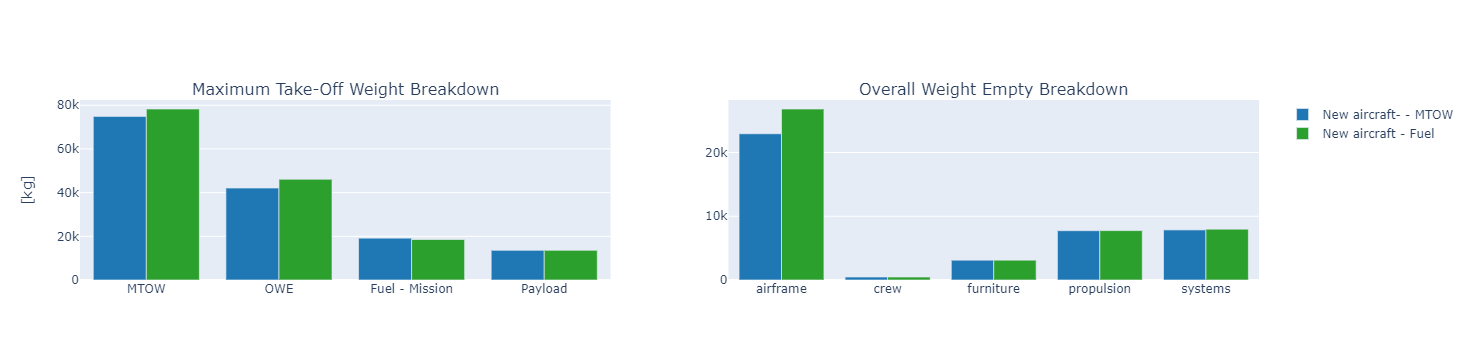

In [10]:
fig = oad.mass_breakdown_bar_plot(CeRAS_2750nm_MDA_OUTPUT_FILE, name="New aircraft- - MTOW")
# fig = oad.mass_breakdown_bar_plot(CeRAS_800nm_MDA_OUTPUT_FILE, name='New aircraft', fig=fig)
fig = oad.mass_breakdown_bar_plot(CeRAS_2750nm_MDO_OUTPUT_FILE, name="New aircraft - Fuel", fig=fig)
fig.show()

## 4. Mission and trajectory plots

In the previous notebook the computation process generates a file `flight_points.csv` that contains the values of the variables used in the performance module. By default the performance uses a Breguet-based mission. However, you can switch to a full mission profile that you can define by modifying the configuration file:

```yml
  performance:
    id: fastoad.performances.mission
    propulsion_id: fastoad.wrapper.propulsion.rubber_engine
    # mission_file_path: ::sizing_breguet
    mission_file_path: ::sizing_mission
    out_file:  ./flight_points.csv
    adjust_fuel: true
    is_sizing: true
```

In the previous notebook, we have saved the results for each design case.

In [ ]:
WORK_FOLDER_PATH = "workdir"

CeRAS_2750nm_MDA_MISSION_FILE = pth.join(WORK_FOLDER_PATH, "mission_CeRAS_2750nm_mda.csv")
CeRAS_800nm_MDA_MISSION_FILE = pth.join(WORK_FOLDER_PATH, "mission_CeRAS_800nm_mda.csv")
CeRAS_2750nm_MDO_MISSION_FILE = pth.join(WORK_FOLDER_PATH, "mission_CeRAS_2750nm_mdo.csv")

An other post-processing tool is available: the mission viewer.
You simply add the mission files that interest you:

In [ ]:
mission = oad.MissionViewer()
mission.add_mission(CeRAS_2750nm_MDA_MISSION_FILE, name="CeRAS 2750 nm MDA")
mission.add_mission(CeRAS_800nm_MDA_MISSION_FILE, name="CeRAS 800 nm MDA")
mission.add_mission(CeRAS_2750nm_MDO_MISSION_FILE, name="CeRAS 2750 nm MDO")

You can visualize the data of the mission:

In [ ]:
mission.missions["CeRAS 2750 nm MDA"]

Or you can plot the missions:

In [ ]:
mission.display()